In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

Imported all nessessary libraries

In [2]:
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'Enum',
 'F',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'List',
 'Normalize',
 'Optional',
 'PILToTensor',
 'Pad',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'Tensor',
 'ToPILImage',
 'ToTensor',
 'Tuple',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'math',
 'torch',
 'transforms']

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [4]:
dataset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train', download=True, transform = transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./datasets/cifar10/train/cifar-10-python.tar.gz to ./datasets/cifar10/train


In [5]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./datasets/cifar10/train
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [6]:
dataloader = torch.utils.data.DataLoader(dataset,
                                        batch_size=64,
                                        shuffle=True,
                                        num_workers=2)

In [7]:
data_mean = []
data_std = []

for i, data in enumerate(dataloader, 0):
    
    numpy_image = data[0].numpy()
    
    batch_mean = np.mean(numpy_image, axis=(0, 2, 3))
    batch_std = np.std(numpy_image, axis=(0, 2, 3))
    
    data_mean.append(batch_mean)
    data_std.append(batch_std)
    
data_mean = np.array(data_mean)
data_std = np.array(data_std)

data_mean = data_mean.mean(axis=0)
data_std = data_std.mean(axis=0)

In [8]:
print(data_mean)
print(data_std)

[0.49133664 0.48212263 0.44654334]
[0.24636616 0.24282514 0.2607471 ]


In [9]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(32),
    transforms.RandomHorizontalFlip(),
    transforms.Pad(4),
    transforms.ToTensor(),
    transforms.Normalize(data_mean, data_std)
])

In [10]:
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(data_mean, data_std)
])

In [11]:
trainset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train', 
                                        train=True,
                                        download=True, 
                                        transform = train_transform)

Files already downloaded and verified


In [12]:
testset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train', 
                                        train=False,
                                        download=True, 
                                        transform = test_transform)

Files already downloaded and verified


In [13]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=2)

In [14]:
testloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=64,
                                          shuffle=False,
                                          num_workers=2)

In [15]:
num_channels = 3

out1_size = 4096
out2_size = 1000
out3_size = 10

size_64 = 64
size_128 = 128
size_256 = 256
size_512 = 512

kernel_size = 3

In [1]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(num_channels, size_64, kernel_size, padding = 1, bias = False), #40*40
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #20*20
            nn.BatchNorm2d(size_64)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(size_64, size_128, kernel_size, padding = 1, bias = False), #20*20
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #10*10
            nn.BatchNorm2d(size_128)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(size_128, size_256, kernel_size, padding = 1, bias = False), #10*10
            nn.ReLU(),
            nn.BatchNorm2d(size_256)#
        )
        
        self.conv4 = nn.Sequential(
            nn.Conv2d(size_256, size_256, kernel_size, padding = 1, bias = False), #10*10
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #5*5
            nn.BatchNorm2d(size_256)
        )
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(size_256, size_512, kernel_size, padding = 1, bias = False), #5*5
            nn.ReLU(),
            nn.BatchNorm2d(size_512)#
        )
        
        self.conv6 = nn.Sequential(
            nn.Conv2d(size_512, size_512, kernel_size, padding = 1, bias = False), #5*5
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #2*2
            nn.BatchNorm2d(size_512)
        )
        
        self.conv7 = nn.Sequential(
            nn.Conv2d(size_512, size_512, kernel_size, padding = 1, bias = False), #2*2
            nn.ReLU(),
            nn.BatchNorm2d(size_512)#
        )
        
        self.conv8 = nn.Sequential(
            nn.Conv2d(size_512, size_512, kernel_size, padding = 1, bias = False), #2*2
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #1*1
            nn.BatchNorm2d(size_512),
        )
        
        self.extraconv64 = nn.Sequential(
            nn.Conv2d(num_channels, size_64, kernel_size, padding = 1, bias = False), 
            nn.ReLU(),
            nn.BatchNorm2d(size_64)#
        )
        
        self.altconv1 = nn.Sequential(
            nn.Conv2d(size_64, size_64, kernel_size, padding = 1, bias = False), #40*40
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #20*20
            nn.BatchNorm2d(size_64)
        )
        
        self.extraconv128 = nn.Sequential(
            nn.Conv2d(size_64, size_128, kernel_size, padding = 1, bias = False), 
            nn.ReLU(),
            nn.BatchNorm2d(size_128)#
        )
        
        self.altconv2 = nn.Sequential(
            nn.Conv2d(size_128, size_128, kernel_size, padding = 1, bias = False), #20*20
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #10*10
            nn.BatchNorm2d(size_128)
        )
        
        self.extraconv256 = nn.Sequential(
            nn.Conv2d(size_256, size_256, kernel_size, padding = 1, bias = False), 
            nn.ReLU(),
            nn.BatchNorm2d(size_256)#
        )
        
        self.extraconv512 = nn.Sequential(
            nn.Conv2d(size_512, size_512, kernel_size, padding = 1, bias = False), 
            nn.ReLU(),
            nn.BatchNorm2d(size_512),#
        )
        
        self.linear1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(size_512, out1_size),
            nn.ReLU(),
            #nn.Dropout(0.5)
        )
        
        self.linear2 = nn.Sequential(
            nn.Linear(out1_size, out2_size),
            nn.ReLU(),
            #nn.Dropout(0.5)
        )
        
        self.linear3 = nn.Sequential(
            nn.Linear(out2_size, out3_size)
        )
        
    def forward(self, x):
        
#         out = self.conv1(x)
#         out = self.conv2(out)
        out = self.extraconv64(x)
        out = self.altconv1(out)
        out = self.extraconv128(out)
        out = self.altconv2(out)
        out = self.conv3(out)
        out = self.extraconv256(out)
        out = self.extraconv256(out)
        out = self.conv4(out)
        out = self.conv5(out)
        out = self.extraconv512(out)
        out = self.extraconv512(out)
        out = self.conv6(out)
        out = self.conv7(out)
        out = self.extraconv512(out)
        out = self.extraconv512(out)
        out = self.conv8(out)
        
        out = self.linear1(out)
        out = self.linear2(out)
        out = self.linear3(out)

        
        return out       

NameError: name 'nn' is not defined

In [89]:
model = ConvNet()

In [90]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [91]:
print(device)

cuda:0


In [92]:
model.to(device)

ConvNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
  )
  (conv4): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(256, eps=1e-05, mom

In [93]:
learning_rate = 0.0001

loss_metric = nn.CrossEntropyLoss()
#weight decay
#optimizer= torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.9, weight_decay = 0.0001)
optimizer = torch.optim.AdamW(model.parameters(), lr = learning_rate, weight_decay = 0.0001)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr = learning_rate, steps_per_epoch = len(trainloader), 
                                                epochs = 50, base_momentum = 0.85, max_momentum = 0.95, 
                                                div_factor = 10, final_div_factor = 10, three_phase = True,
                                                anneal_strategy = 'cos', pct_start = 0.4)

In [94]:
num_epochs = 50

train_accuracies = []
train_losses = []
train_lr = []

In [95]:
for epoch in range(num_epochs):
    
    running_loss=0
    correct = 0
    total = 0
    
    print('LR:', scheduler.get_lr())
    
    train_lr.append(scheduler.get_lr())
    
    for i, (images, labels) in enumerate(trainloader):
        
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = loss_metric(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()
     
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
       
    train_loss=running_loss/len(trainloader)
    accuracy=100*correct/total
   
    #scheduler.step()

    train_accuracies.append(accuracy)
    train_losses.append(train_loss)
        
        
    print('Epoch:', epoch+1, 'Loss:', train_loss, 'Accuracy: {}%', accuracy)

print('Finished Training')

LR: [3.0000000000000024e-05]
Epoch: 1 Loss: 1.7621541174171527 Accuracy: {}% 35.164
LR: [3.0328871898279417e-05]
Epoch: 2 Loss: 1.5391747744949273 Accuracy: {}% 43.858
LR: [3.131388527125869e-05]
Epoch: 3 Loss: 1.4325836550854052 Accuracy: {}% 48.484
LR: [3.2950240960155544e-05]
Epoch: 4 Loss: 1.355192809687246 Accuracy: {}% 51.192
LR: [3.522996635161197e-05]
Epoch: 5 Loss: 1.2948380974704956 Accuracy: {}% 53.88
LR: [3.8141954221671784e-05]
Epoch: 6 Loss: 1.2276812602034615 Accuracy: {}% 56.388
LR: [4.16720168521336e-05]
Epoch: 7 Loss: 1.1891257634095829 Accuracy: {}% 57.934
LR: [4.580295515561471e-05]
Epoch: 8 Loss: 1.1423519173698962 Accuracy: {}% 59.362
LR: [5.051464247253691e-05]
Epoch: 9 Loss: 1.1037453848230259 Accuracy: {}% 61.248
LR: [5.57841226317591e-05]
Epoch: 10 Loss: 1.0742282614378673 Accuracy: {}% 62.074
LR: [6.158572179709008e-05]
Epoch: 11 Loss: 1.0457951019487113 Accuracy: {}% 63.548
LR: [6.789117355474378e-05]
Epoch: 12 Loss: 1.0247070618602625 Accuracy: {}% 64.248
L

In [96]:
model.eval()

running_loss=0
correct=0
total=0
 
with torch.no_grad():
    for i, (images, labels) in enumerate(testloader):
        images, labels = images.to(device), labels.to(device)
       
        outputs=model(images)
 
        loss= loss_metric(outputs,labels)
        running_loss+=loss.item()
       
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
test_loss=running_loss/len(testloader)
accuracy=100*correct/total

print('Test Loss: %.3f | Accuracy: %.3f'%(test_loss,accuracy)) 

Test Loss: 0.247 | Accuracy: 91.760


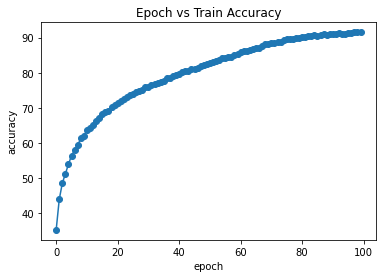

In [97]:
plt.plot(train_accuracies,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Epoch vs Train Accuracy')
 
plt.show()

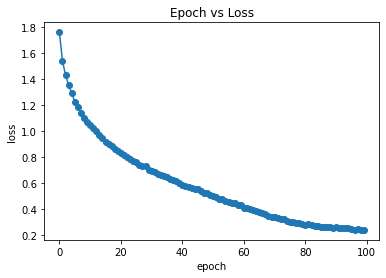

In [98]:
plt.plot(train_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Epoch vs Loss')
 
plt.show()

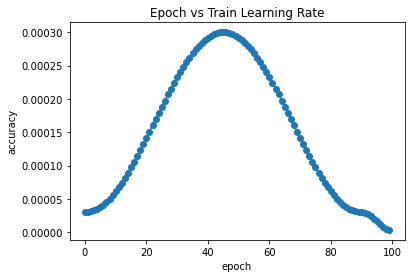

In [99]:
plt.plot(train_lr,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Epoch vs Train Learning Rate')
 
plt.show()